In [376]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [458]:
#Loading Bank Dataset
bank = pd.read_csv('/Users/Bunny/Documents/Prasanthi/Springboard/Projects/Capstone 1 /Bank Marketing dataset/bank-additional/bank-additional-full.csv', delimiter=';')

In [459]:
#Data at a glance
bank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [460]:
#Variables present in the dataset
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [461]:
#Dataset dimensions
bank.shape

(41188, 21)

In [462]:
#Renaming Dependent Variable 'y' as 'outcome' and 'campaign' as 'number_calls'
bank = bank.rename(columns= {'y':'outcome','campaign' : 'number_calls'})
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'number_calls', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'outcome'],
      dtype='object')

## Data Wrangling

### Missing value treatment

In [463]:
# % missing values for each attribute
bank.isnull().sum()/41188*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
number_calls      0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
outcome           0.0
dtype: float64

In [464]:
#Replacing unknown values with np.NaN
bank = bank.replace('unknown', np.NaN)

In [465]:
#Removing rows containing null values
bank = bank.dropna(axis = 0)

In [466]:
#Investigating 'default' variable 
y_default = bank.groupby(['outcome', 'default']).size().unstack('default')
y_default

default,no,yes
outcome,,
no,26626.0,3.0
yes,3859.0,NaN


* According to this, only 3 customers with credit defaults have been contacted and the remaining contacted were those with either no credit amounts or with cleared monthly payments. This attribute will therefore be of no use for predicting the outcome and hence will be removed.

In [467]:
#remove 'default' variable from the dataset
bank = bank.drop('default',axis=1)

* The variable ‘duration’ highly affects the output target; i.e. if a call has not been made at all or not been picked by the customer it results in a failed outcome. Yet, the duration is not known before a call is performed. Also, after the end of the call outcome is obviously known (success or a failure). Hence this variable has been removed from future predictive analysis. 

In [468]:
#Remove 'duration' variable from the dataset
bank = bank.drop('duration',axis=1)

### Transforming variables

In [469]:
#Converting dependent variable'outcome' from categorical to numerical. yes = 1 , no = 0
bank['outcome'] = (bank['outcome']=='yes').astype(int)

In [470]:
#Combining all basic education into one category 'basic'
bank['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'professional.course',
       'basic.9y', 'university.degree', 'illiterate'], dtype=object)

In [471]:
bank['education']=np.where(bank['education']=='basic.4y','basic',bank['education'])
bank['education']=np.where(bank['education']=='basic.6y','basic',bank['education'])
bank['education']=np.where(bank['education']=='basic.9y','basic',bank['education'])

### Exploratory Data Analysis

In [472]:
#Summary statistics of Continuous varibles
bank.describe()

,age,number_calls,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409,0.126574
std,10.333529,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065,0.332501
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,31.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000,0.000000
50%,37.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000,0.000000
75%,45.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,95.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Average age of customers contacted for this campaign is 39 years and each customer was contacted approx. 3 times before hearing a decision from them.

In [473]:
#Distribution of 'outcome' variable
bank.groupby('outcome').size()/30488*100


outcome
0    87.342561
1    12.657439
dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12699d668>], dtype=object)

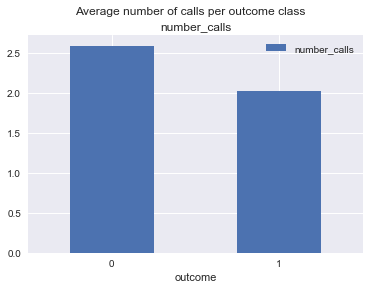

In [474]:
# Average number of calls per outcome class
bank[['number_calls','outcome']].groupby(['outcome']).mean().plot(kind='bar',subplots=True,rot=360,title= 'Average number of calls per outcome class') 

In [475]:
campaign_calls = (bank['number_calls'] <= 3).sum()*100/ 30488
print('% of customers contacted 3 or less than 3 times:',campaign_calls,('%'))
print('% of customers contacted more than 3 times:', (100-campaign_calls),('%'))

% of customers contacted 3 or less than 3 times: 82.0781946996 %
% of customers contacted more than 3 times: 17.9218053004 %


In [476]:
#Changing age variable into an integer in order to create categories
bank['age'].astype(int)
bank['age'].dtypes


dtype('int64')

In [477]:
#Converting Age variable to a categorical variable 'age_category'
bank['age_category']=np.where(bank['age'] < 25,'1)Young adult',bank['age'])
bank['age_category']=np.where((bank['age'] >= 25) & (bank['age'] < 35 ),'2)Adult',bank['age_category'])
bank['age_category']=np.where((bank['age'] >= 35) & (bank['age'] < 54 ),'3)Middle Aged',bank['age_category'])
bank['age_category']=np.where((bank['age'] >= 54) & (bank['age'] < 60 ),'4)Pre-retirement',bank['age_category'])
bank['age_category']=np.where((bank['age'] >= 60),'5)Post-retirement',bank['age_category'])

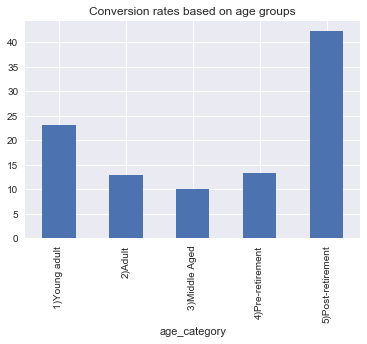

In [478]:
#Conversion rates based on Age categories 
age = bank.groupby('outcome').age_category.value_counts().unstack('outcome')
age['conversion_rates'] = (age[1]/(age[0]+age[1]))*100
age['conversion_rates'].plot(kind='bar',title='Conversion rates based on age groups',rot=90)

In [479]:
from scipy.stats import chi2_contingency

In [480]:
#Chi-Square test to check existence of statistical difference among Age groups
outcome_age = bank.groupby(['outcome', 'age_category']).size().unstack('age_category')
outcome_age

age_category,1)Young adult,2)Adult,3)Middle Aged,4)Pre-retirement,5)Post-retirement
outcome,,,,,
0,665,9983,13513,1959,509
1,199,1481,1505,301,373


In [481]:
#Returns chi2, p-value, Degrees of freedom, contingency_table
contingency_table = chi2_contingency(outcome_age)
contingency_table

(880.68049694478123,
 2.5552503927601855e-189,
 4,
 array([[   754.63972711,  10012.95119391,  13117.10581212,   1973.94187877,
            770.36138809],
        [   109.36027289,   1451.04880609,   1900.89418788,    286.05812123,
            111.63861191]]))

Chi-tabular < Chi-calculated with a p-value <0.05 indicates that there is a significant difference in outcome based on different categories of age. 

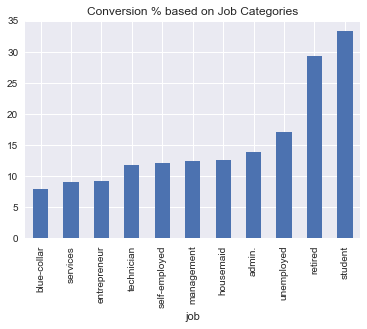

In [482]:
#Conversion rates based on Job Categories
job = bank.groupby('outcome').job.value_counts().unstack('outcome')
job['conversion_rate']= 100*job[1]/(job[0]+job[1])
job['conversion_rate'].sort_values().plot(kind= 'bar', title = 'Conversion % based on Job Categories')

In [483]:
print('The mean age of retired individuals is:', round(bank[bank.job == 'retired'].age.mean()),'yrs')

The mean age of retired individuals is: 63 yrs


In [484]:
print('The mean age of student category is:', round(bank[bank.job == 'student'].age.mean()),'yrs')

The mean age of student category is: 25 yrs


The top two categories with highest conversion rates are Retired individuals and Students. When mean ages of these two categoeires were calculated, observations seemed to be in sync. 

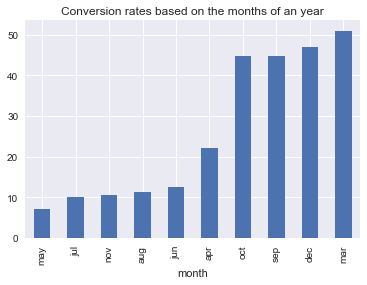

In [485]:
#Conversion rates based on different Months of an year
month_wise = bank.groupby('outcome').month.value_counts().unstack('outcome')
month_wise['conversion_rate']= 100*month_wise[1]/(month_wise[0]+month_wise[1])
month_wise['conversion_rate'].sort_values().plot(kind= 'bar', title = 'Conversion rates based on the months of an year')

The Portuguese tax year runs concurrently with the calendar year from 1 January to 31 December. Individuals hold liquid cash until year-end in anticipation of unexpected expenditures over the course of that year. 

While locking funds in low-return investments such as term deposits in initial months itself might not be a good decision, year-end could be a good time to invest in them in order maximize tax benefits.

Data ranges from May 2008 to Nov 2010, thus reducing the possibility of random occurrences to a good extent.



outcome,0,1,conversion_rate
marital,,,
divorced,3143,410,11.539544
married,15436,2056,11.753945
single,8050,1393,14.751668


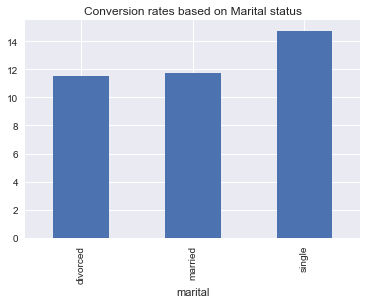

In [486]:
#Conversion rates based on marital status
marital_status = bank.groupby('outcome').marital.value_counts().unstack('outcome')
marital_status['conversion_rate']= 100*marital_status[1]/(marital_status[0]+marital_status[1])
marital_status['conversion_rate'].sort_values().plot(kind= 'bar', title = 'Conversion rates based on Marital status')
marital_status

Not much difference can be seen in conversion rates among categories based on martital status. 

###  Check for Multi-collinearity 

In [487]:
bank.corr() > 0.5

,age,number_calls,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
age,True,False,False,False,False,False,False,False,False,False
number_calls,False,True,False,False,False,False,False,False,False,False
pdays,False,False,True,False,False,False,False,False,False,False
previous,False,False,False,True,False,False,False,False,False,False
emp.var.rate,False,False,False,False,True,True,False,True,True,False
cons.price.idx,False,False,False,False,True,True,False,True,False,False
cons.conf.idx,False,False,False,False,False,False,True,False,False,False
euribor3m,False,False,False,False,True,True,False,True,True,False
nr.employed,False,False,False,False,True,False,False,True,True,False
outcome,False,False,False,False,False,False,False,False,False,True


High collinearity exists among the following macro-econimic factors:
- Employee Variable rate, Consumer Price Index, Euribor 3m rate and number employed
In order to eliminate 
Backward Step-wise regression with pseudo R2 as a basis shall be performed to eliminate collinearity issue.

In [488]:
# Importing statsmodel library for logistic regression
import statsmodels.api as sm
logit_model=sm.Logit(bank_y,bank_x)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.297947
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                30488
Model:                          Logit   Df Residuals:                    30442
Method:                           MLE   Df Model:                           45
Date:                Sat, 04 Nov 2017   Pseudo R-squ.:                  0.2156
Time:                        19:44:51   Log-Likelihood:                -9083.8
converged:                       True   LL-Null:                       -11580.
                                        LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
number_calls                      -0.0990      0.028     -3.561      0.000      -0.153      -0.045
pdays                             -0.2711      0.044     -6.134      0.000      -0.358      -0.184
previous                          -0.1610      0.029     -5.469      0.000      -0.219      -0.103
emp.var.rate                      -2.5814      0.215    -11.998      0.000      -3.003      -2.160
cons.price.idx                     1.2465      0.142      8.799      0.000       0.969       1.524
cons.conf.idx                      0.1436      0.037      3.894      0.000       0.071       0.216
euribor3m                          0.8294      0.226      3.664      0.000       0.386       1.273
nr.employed                        0.3009      0.226      1.331      0.183      -0.142       0.744
job_blue-collar                   -0.3974      0.075     -5.266      0.000      -0.545      -0.250
job_entrepreneur                  -0.2215      0.119     -1.860      0.063      -0.455       0.012
job_housemaid                     -0.2245      0.145     -1.552      0.121      -0.508       0.059
job_management                    -0.1191      0.081     -1.476      0.140      -0.277       0.039
job_retired                       -0.0701      0.122     -0.576      0.564      -0.308       0.168
job_self-employed                 -0.1527      0.110     -1.395      0.163      -0.367       0.062
job_services                      -0.3100      0.083     -3.756      0.000      -0.472      -0.148
job_student                       -0.2551      0.118     -2.160      0.031      -0.487      -0.024
job_technician                    -0.1166      0.066     -1.764      0.078      -0.246       0.013
job_unemployed                    -0.1501      0.121     -1.241      0.215      -0.387       0.087
marital_married                   -0.2322      0.060     -3.887      0.000      -0.349      -0.115
marital_single                    -0.3366      0.067     -5.022      0.000      -0.468      -0.205
education_high.school             -0.1510      0.064     -2.368      0.018      -0.276      -0.026
education_illiterate               1.0750      0.733      1.466      0.143      -0.362       2.513
education_professional.course     -0.1122      0.077     -1.456      0.145      -0.263       0.039
education_university.degree       -0.0712      0.064     -1.104      0.270      -0.198       0.055
housing_yes                       -0.0998      0.039     -2.552      0.011      -0.176      -0.023
loan_yes                          -0.0498      0.055     -0.913      0.361      -0.157       0.057
contact_telephone                 -0.9215      0.074    -12.398      0.000      -1.067      -0.776
month_aug                          0.0614      0.113      0.544      0.586      -0.160       0.283
month_dec                         -0.0178      0.205     -0.087      0.931      -0.419       0.383
month_jul                         -0.4229      0.086     -4.898      0.00

In [491]:
bank_x1=bank_x.drop('euribor3m',axis = 1)
logit_model=sm.Logit(bank_y,bank_x1)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.298169
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                30488
Model:                          Logit   Df Residuals:                    30443
Method:                           MLE   Df Model:                           44
Date:                Sat, 04 Nov 2017   Pseudo R-squ.:                  0.2150
Time:                        19:45:16   Log-Likelihood:                -9090.6
converged:                       True   LL-Null:                       -11580.
                                        LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
number_calls                      -0.1032      0.028     -3.714      0.000      -0.158      -0.049
pdays                             -0.2754      0.044     -6.234      0.000      -0.362      -0.189
previous                          -0.1671      0.029     -5.679      0.000      -0.225      -0.109
emp.var.rate                      -2.5273      0.216    -11.717      0.000      -2.950      -2.105
cons.price.idx                     1.4837      0.126     11.777      0.000       1.237       1.731
cons.conf.idx                      0.2418      0.025      9.515      0.000       0.192       0.292
nr.employed                        0.9315      0.146      6.381      0.000       0.645       1.218
job_blue-collar                   -0.4190      0.075     -5.574      0.000      -0.566      -0.272
job_entrepreneur                  -0.2306      0.119     -1.940      0.052      -0.464       0.002
job_housemaid                     -0.2285      0.145     -1.580      0.114      -0.512       0.055
job_management                    -0.1220      0.081     -1.514      0.130      -0.280       0.036
job_retired                       -0.0789      0.122     -0.649      0.516      -0.317       0.159
job_self-employed                 -0.1539      0.109     -1.408      0.159      -0.368       0.060
job_services                      -0.3202      0.082     -3.886      0.000      -0.482      -0.159
job_student                       -0.2742      0.118     -2.324      0.020      -0.506      -0.043
job_technician                    -0.1188      0.066     -1.798      0.072      -0.248       0.011
job_unemployed                    -0.1575      0.121     -1.303      0.192      -0.394       0.079
marital_married                   -0.2424      0.060     -4.073      0.000      -0.359      -0.126
marital_single                    -0.3515      0.067     -5.266      0.000      -0.482      -0.221
education_high.school             -0.1650      0.064     -2.594      0.009      -0.290      -0.040
education_illiterate               1.0530      0.736      1.431      0.152      -0.389       2.495
education_professional.course     -0.1213      0.077     -1.577      0.115      -0.272       0.029
education_university.degree       -0.0799      0.064     -1.242      0.214      -0.206       0.046
housing_yes                       -0.1002      0.039     -2.566      0.010      -0.177      -0.024
loan_yes                          -0.0514      0.055     -0.942      0.346      -0.158       0.056
contact_telephone                 -0.9295      0.075    -12.474      0.000      -1.076      -0.783
month_aug                          0.1220      0.112      1.091      0.275      -0.097       0.341
month_dec                          0.1946      0.196      0.991      0.322      -0.190       0.579
month_jul                         -0.3905      0.086     -4.535      0.000      -0.559      -0.222
month_jun                         -1.0681      0.118     -9.087      0.00

In [492]:
bank_x2=bank_x.drop(['euribor3m','nr.employed'],axis = 1)
logit_model=sm.Logit(bank_y,bank_x2)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.298836
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:                30488
Model:                          Logit   Df Residuals:                    30444
Method:                           MLE   Df Model:                           43
Date:                Sat, 04 Nov 2017   Pseudo R-squ.:                  0.2132
Time:                        19:45:17   Log-Likelihood:                -9110.9
converged:                       True   LL-Null:                       -11580.
                                        LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
number_calls                      -0.1074      0.028     -3.843      0.000      -0.162      -0.053
pdays                             -0.2795      0.044     -6.351      0.000      -0.366      -0.193
previous                          -0.1661      0.029     -5.671      0.000      -0.224      -0.109
emp.var.rate                      -1.1712      0.037    -31.900      0.000      -1.243      -1.099
cons.price.idx                     0.7109      0.034     21.088      0.000       0.645       0.777
cons.conf.idx                      0.1827      0.023      7.780      0.000       0.137       0.229
job_blue-collar                   -0.4262      0.075     -5.667      0.000      -0.574      -0.279
job_entrepreneur                  -0.2198      0.119     -1.850      0.064      -0.453       0.013
job_housemaid                     -0.2398      0.144     -1.661      0.097      -0.523       0.043
job_management                    -0.1246      0.081     -1.546      0.122      -0.282       0.033
job_retired                       -0.0805      0.121     -0.664      0.507      -0.318       0.157
job_self-employed                 -0.1528      0.109     -1.401      0.161      -0.367       0.061
job_services                      -0.3206      0.082     -3.894      0.000      -0.482      -0.159
job_student                       -0.2722      0.118     -2.310      0.021      -0.503      -0.041
job_technician                    -0.1283      0.066     -1.947      0.051      -0.257       0.001
job_unemployed                    -0.1677      0.121     -1.389      0.165      -0.404       0.069
marital_married                   -0.2389      0.059     -4.018      0.000      -0.355      -0.122
marital_single                    -0.3516      0.067     -5.272      0.000      -0.482      -0.221
education_high.school             -0.1711      0.064     -2.691      0.007      -0.296      -0.046
education_illiterate               1.0312      0.734      1.405      0.160      -0.408       2.470
education_professional.course     -0.1306      0.077     -1.699      0.089      -0.281       0.020
education_university.degree       -0.0888      0.064     -1.381      0.167      -0.215       0.037
housing_yes                       -0.1043      0.039     -2.676      0.007      -0.181      -0.028
loan_yes                          -0.0559      0.055     -1.025      0.305      -0.163       0.051
contact_telephone                 -0.7518      0.067    -11.276      0.000      -0.882      -0.621
month_aug                         -0.2379      0.097     -2.464      0.014      -0.427      -0.049
month_dec                         -0.0425      0.192     -0.222      0.825      -0.418       0.333
month_jul                         -0.3086      0.085     -3.648      0.000      -0.474      -0.143
month_jun                         -0.5450      0.084     -6.475      0.000      -0.710      -0.380
month_mar                          0.9940      0.113      8.762      0.00

In [497]:
bank_x2[['emp.var.rate','cons.price.idx','cons.conf.idx']].corr()>0.5

,emp.var.rate,cons.price.idx,cons.conf.idx
emp.var.rate,True,True,False
cons.price.idx,True,True,False
cons.conf.idx,False,False,True


In [ ]:
bank_x3=bank_x.drop(['euribor3m','nr.employed',''],axis = 1)
logit_model=sm.Logit(bank_y,bank_x2)
result=logit_model.fit()
result.summary()

###  Standarding variables: x* = (x-m)/sd

In [434]:
bank.describe()

,age,number_calls,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409,0.126574
std,10.333529,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065,0.332501
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,31.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000,0.000000
50%,37.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000,0.000000
75%,45.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,95.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [435]:
bank_continuous = bank[['number_calls','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [439]:
#Standardizing dataset
for columns in bank_continuous:
    bank[columns] = (bank[columns]-np.mean(bank[columns]))/(np.std(bank[columns]))
    columns = range(bank_continuous.shape[1])

In [440]:
bank.describe()

,age,number_calls,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,outcome
count,30488.000000,3.048800e+04,3.048800e+04,3.048800e+04,3.048800e+04,3.048800e+04,3.048800e+04,3.048800e+04,3.048800e+04,30488.000000
mean,39.030012,-1.112334e-14,-1.546679e-14,2.262870e-15,2.016334e-13,-5.824479e-14,7.781408e-15,5.331011e-14,1.112186e-13,0.126574
std,10.333529,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,1.000016e+00,0.332501
min,17.000000,-5.593352e-01,-4.749130e+00,-3.716159e-01,-2.066906e+00,-2.258953e+00,-2.129332e+00,-1.590105e+00,-2.624025e+00,0.000000
25%,31.000000,-5.593352e-01,2.118871e-01,-3.716159e-01,-1.073347e+00,-7.658666e-01,-4.380167e-01,-1.208044e+00,-8.211284e-01,0.000000
50%,37.000000,-1.917025e-01,2.118871e-01,-3.716159e-01,7.274775e-01,-1.354903e-01,-2.500927e-01,7.855395e-01,4.016480e-01,0.000000
75%,45.000000,1.759303e-01,2.118871e-01,-3.716159e-01,9.137697e-01,8.040951e-01,8.774511e-01,8.446212e-01,8.952824e-01,0.000000
max,95.000000,1.488124e+01,2.118871e-01,1.301835e+01,9.137697e-01,2.124640e+00,2.861093e+00,8.918865e-01,8.952824e-01,1.000000


### Creating dummy variables

In [441]:
bank_x = bank.drop(['outcome','age'],axis=1)

In [442]:
bank_x = pd.get_dummies(bank_x,drop_first= True)
bank_x.head()

,number_calls,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,age_category_2)Adult,age_category_3)Middle Aged,age_category_4)Pre-retirement,age_category_5)Post-retirement
0,-0.559335,0.211887,-0.371616,0.727477,0.804095,0.877451,0.786102,0.401648,0,0,...,1,0,0,0,1,0,0,0,1,0
2,-0.559335,0.211887,-0.371616,0.727477,0.804095,0.877451,0.786102,0.401648,0,0,...,1,0,0,0,1,0,0,1,0,0
3,-0.559335,0.211887,-0.371616,0.727477,0.804095,0.877451,0.786102,0.401648,0,0,...,1,0,0,0,1,0,0,1,0,0
4,-0.559335,0.211887,-0.371616,0.727477,0.804095,0.877451,0.786102,0.401648,0,0,...,1,0,0,0,1,0,0,0,1,0
6,-0.559335,0.211887,-0.371616,0.727477,0.804095,0.877451,0.786102,0.401648,0,0,...,1,0,0,0,1,0,0,0,1,0


In [363]:
bank_y = bank['outcome']

### Feature importance 

In [443]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(bank_x, bank_y)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [365]:
feature_imp = clf.feature_importances_
list_feature_imp = list(zip(bank_x,feature_imp))
list_feature_imp = sorted(list_feature_imp,key = lambda x:x[1],reverse= True)
list_feature_imp = pd.DataFrame(list_feature_imp)
list_feature_imp

,0,1
0,euribor3m,0.147784
1,number_calls,0.119753
2,housing_yes,0.050698
3,cons.conf.idx,0.047367
4,poutcome_success,0.042992
5,cons.price.idx,0.039516
6,pdays,0.032433
7,loan_yes,0.029147
8,marital_married,0.027366
9,nr.employed,0.025861


In [212]:
# Step-wise regression to eliminate multicollinearity
import statsmodels.api as sm

In [213]:
bank_x['intercept'] = 1

In [214]:
logit_model=sm.Logit(bank_y,bank_x)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.275268
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                38245
Model:                          Logit   Df Residuals:                    38201
Method:                           MLE   Df Model:                           43
Date:                Sat, 07 Oct 2017   Pseudo R-squ.:                  0.2119
Time:                        23:22:40   Log-Likelihood:                -10528.
converged:                       True   LL-Null:                       -13359.
                                        LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                              -0.0012      0.002     -0.554      0.580      -0.006       0.003
campaign                         -0.0422      0.010     -4.441      0.000      -0.061      -0.024
pdays                            -0.0011      0.000     -5.052      0.000      -0.002      -0.001
previous                         -0.0669      0.059     -1.125      0.261      -0.183       0.050
emp.var.rate                     -1.5421      0.129    -11.943      0.000      -1.795      -1.289
cons.price.idx                    2.1787      0.229      9.500      0.000       1.729       2.628
cons.conf.idx                     0.0309      0.007      4.209      0.000       0.017       0.045
euribor3m                         0.2068      0.120      1.728      0.084      -0.028       0.441
nr.employed                       0.0074      0.003      2.612      0.009       0.002       0.013
job_blue-collar                  -0.1435      0.072     -1.998      0.046      -0.284      -0.003
job_entrepreneur                 -0.0654      0.111     -0.590      0.555      -0.283       0.152
job_housemaid                    -0.0976      0.132     -0.737      0.461      -0.357       0.162
job_management                   -0.0517      0.078     -0.665      0.506      -0.204       0.101
job_retired                       0.2515      0.098      2.557      0.011       0.059       0.444
job_self-employed                -0.0311      0.104     -0.300      0.764      -0.234       0.172
job_services                     -0.1492      0.078     -1.910      0.056      -0.302       0.004
job_student                       0.2263      0.110      2.063      0.039       0.011       0.441
job_technician                   -0.0028      0.064     -0.044      0.965      -0.129       0.123
job_unemployed                   -0.0255      0.114     -0.223      0.824      -0.249       0.198
marital_married                   0.0199      0.062      0.321      0.748      -0.102       0.142
marital_single                    0.0516      0.071      0.729      0.466      -0.087       0.190
education_high.school             0.0607      0.062      0.980      0.327      -0.061       0.182
education_illiterate              0.8907      0.646      1.379      0.168      -0.376       2.157
education_professional.course     0.0651      0.074      0.884      0.377      -0.079       0.210
education_university.degree       0.1435      0.063      2.286      0.022       0.020       0.267
housing_yes                      -0.0438      0.037     -1.180      0.238      -0.116       0.029
loan_yes                         -0.0332      0.051     -0.647      0.517      -0.134       0.067
contact_telephone                -0.7812      0.071    -11.034      0.000      -0.920      -0.642
month_aug                         0.4854      0.113      4.279      0.000       0.263       0.708
month_dec                         0.4331      0.201      2.155      0.031       0.039       0.827
month_j

In [215]:
bank_x1 = bank_x.drop('emp.var.rate',axis=1)

logit_model=sm.Logit(bank_y,bank_x1)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.277117
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                38245
Model:                          Logit   Df Residuals:                    38202
Method:                           MLE   Df Model:                           42
Date:                Sat, 07 Oct 2017   Pseudo R-squ.:                  0.2066
Time:                        23:22:40   Log-Likelihood:                -10598.
converged:                       True   LL-Null:                       -13359.
                                        LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                              -0.0005      0.002     -0.222      0.825      -0.005       0.004
campaign                         -0.0461      0.010     -4.814      0.000      -0.065      -0.027
pdays                            -0.0011      0.000     -5.300      0.000      -0.002      -0.001
previous                         -0.0494      0.059     -0.832      0.405      -0.166       0.067
cons.price.idx                   -0.1054      0.126     -0.835      0.404      -0.353       0.142
cons.conf.idx                     0.0175      0.007      2.403      0.016       0.003       0.032
euribor3m                         0.0743      0.122      0.609      0.542      -0.165       0.314
nr.employed                      -0.0121      0.002     -5.201      0.000      -0.017      -0.008
job_blue-collar                  -0.1614      0.072     -2.249      0.025      -0.302      -0.021
job_entrepreneur                 -0.0588      0.111     -0.532      0.595      -0.276       0.158
job_housemaid                    -0.1168      0.132     -0.886      0.376      -0.375       0.142
job_management                   -0.0577      0.078     -0.743      0.458      -0.210       0.094
job_retired                       0.2605      0.098      2.665      0.008       0.069       0.452
job_self-employed                -0.0314      0.103     -0.304      0.761      -0.234       0.171
job_services                     -0.1580      0.078     -2.027      0.043      -0.311      -0.005
job_student                       0.2472      0.109      2.260      0.024       0.033       0.462
job_technician                   -0.0264      0.064     -0.412      0.680      -0.152       0.099
job_unemployed                   -0.0443      0.114     -0.388      0.698      -0.268       0.180
marital_married                   0.0244      0.062      0.395      0.693      -0.097       0.146
marital_single                    0.0570      0.070      0.809      0.418      -0.081       0.195
education_high.school             0.0519      0.062      0.838      0.402      -0.069       0.173
education_illiterate              0.8786      0.640      1.373      0.170      -0.376       2.133
education_professional.course     0.0536      0.074      0.728      0.466      -0.091       0.198
education_university.degree       0.1327      0.063      2.117      0.034       0.010       0.256
housing_yes                      -0.0485      0.037     -1.312      0.190      -0.121       0.024
loan_yes                         -0.0409      0.051     -0.799      0.424      -0.141       0.059
contact_telephone                -0.5060      0.063     -8.005      0.000      -0.630      -0.382
month_aug                        -0.2490      0.096     -2.585      0.010      -0.438      -0.060
month_dec                         0.0469      0.198      0.237      0.813      -0.341       0.434
month_jul                         0.1452      0.086      1.685      0.092      -0.024       0.314
month_j

In [216]:
bank_x2 = bank_x.drop('nr.employed',axis=1)

logit_model=sm.Logit(bank_y,bank_x2)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.275357
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                38245
Model:                          Logit   Df Residuals:                    38202
Method:                           MLE   Df Model:                           42
Date:                Sat, 07 Oct 2017   Pseudo R-squ.:                  0.2117
Time:                        23:22:41   Log-Likelihood:                -10531.
converged:                       True   LL-Null:                       -13359.
                                        LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                              -0.0011      0.002     -0.487      0.627      -0.005       0.003
campaign                         -0.0417      0.010     -4.386      0.000      -0.060      -0.023
pdays                            -0.0011      0.000     -5.065      0.000      -0.002      -0.001
previous                         -0.0682      0.059     -1.149      0.251      -0.185       0.048
emp.var.rate                     -1.3450      0.105    -12.870      0.000      -1.550      -1.140
cons.price.idx                    1.6407      0.100     16.399      0.000       1.445       1.837
cons.conf.idx                     0.0175      0.005      3.340      0.001       0.007       0.028
euribor3m                         0.4422      0.079      5.594      0.000       0.287       0.597
job_blue-collar                  -0.1407      0.072     -1.958      0.050      -0.281       0.000
job_entrepreneur                 -0.0613      0.111     -0.552      0.581      -0.279       0.156
job_housemaid                    -0.1012      0.132     -0.765      0.444      -0.360       0.158
job_management                   -0.0530      0.078     -0.680      0.496      -0.206       0.100
job_retired                       0.2524      0.098      2.568      0.010       0.060       0.445
job_self-employed                -0.0323      0.104     -0.312      0.755      -0.236       0.171
job_services                     -0.1485      0.078     -1.900      0.057      -0.302       0.005
job_student                       0.2258      0.110      2.057      0.040       0.011       0.441
job_technician                   -0.0070      0.064     -0.109      0.913      -0.133       0.119
job_unemployed                   -0.0295      0.114     -0.258      0.796      -0.253       0.194
marital_married                   0.0196      0.062      0.315      0.753      -0.102       0.141
marital_single                    0.0510      0.071      0.721      0.471      -0.088       0.190
education_high.school             0.0607      0.062      0.980      0.327      -0.061       0.182
education_illiterate              0.8938      0.644      1.388      0.165      -0.368       2.156
education_professional.course     0.0625      0.074      0.848      0.396      -0.082       0.207
education_university.degree       0.1397      0.063      2.225      0.026       0.017       0.263
housing_yes                      -0.0461      0.037     -1.244      0.213      -0.119       0.027
loan_yes                         -0.0347      0.051     -0.676      0.499      -0.135       0.066
contact_telephone                -0.7338      0.068    -10.839      0.000      -0.867      -0.601
month_aug                         0.3550      0.102      3.485      0.000       0.155       0.555
month_dec                         0.2631      0.190      1.386      0.166      -0.109       0.635
month_jul                         0.0570      0.087      0.655      0.512      -0.113       0.227
month_j

In [217]:
bank_x3 = bank_x.drop('emp.var.rate',axis=1)

logit_model=sm.Logit(bank_y,bank_x3)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.277117
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                38245
Model:                          Logit   Df Residuals:                    38202
Method:                           MLE   Df Model:                           42
Date:                Sat, 07 Oct 2017   Pseudo R-squ.:                  0.2066
Time:                        23:22:42   Log-Likelihood:                -10598.
converged:                       True   LL-Null:                       -13359.
                                        LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                              -0.0005      0.002     -0.222      0.825      -0.005       0.004
campaign                         -0.0461      0.010     -4.814      0.000      -0.065      -0.027
pdays                            -0.0011      0.000     -5.300      0.000      -0.002      -0.001
previous                         -0.0494      0.059     -0.832      0.405      -0.166       0.067
cons.price.idx                   -0.1054      0.126     -0.835      0.404      -0.353       0.142
cons.conf.idx                     0.0175      0.007      2.403      0.016       0.003       0.032
euribor3m                         0.0743      0.122      0.609      0.542      -0.165       0.314
nr.employed                      -0.0121      0.002     -5.201      0.000      -0.017      -0.008
job_blue-collar                  -0.1614      0.072     -2.249      0.025      -0.302      -0.021
job_entrepreneur                 -0.0588      0.111     -0.532      0.595      -0.276       0.158
job_housemaid                    -0.1168      0.132     -0.886      0.376      -0.375       0.142
job_management                   -0.0577      0.078     -0.743      0.458      -0.210       0.094
job_retired                       0.2605      0.098      2.665      0.008       0.069       0.452
job_self-employed                -0.0314      0.103     -0.304      0.761      -0.234       0.171
job_services                     -0.1580      0.078     -2.027      0.043      -0.311      -0.005
job_student                       0.2472      0.109      2.260      0.024       0.033       0.462
job_technician                   -0.0264      0.064     -0.412      0.680      -0.152       0.099
job_unemployed                   -0.0443      0.114     -0.388      0.698      -0.268       0.180
marital_married                   0.0244      0.062      0.395      0.693      -0.097       0.146
marital_single                    0.0570      0.070      0.809      0.418      -0.081       0.195
education_high.school             0.0519      0.062      0.838      0.402      -0.069       0.173
education_illiterate              0.8786      0.640      1.373      0.170      -0.376       2.133
education_professional.course     0.0536      0.074      0.728      0.466      -0.091       0.198
education_university.degree       0.1327      0.063      2.117      0.034       0.010       0.256
housing_yes                      -0.0485      0.037     -1.312      0.190      -0.121       0.024
loan_yes                         -0.0409      0.051     -0.799      0.424      -0.141       0.059
contact_telephone                -0.5060      0.063     -8.005      0.000      -0.630      -0.382
month_aug                        -0.2490      0.096     -2.585      0.010      -0.438      -0.060
month_dec                         0.0469      0.198      0.237      0.813      -0.341       0.434
month_jul                         0.1452      0.086      1.685      0.092      -0.024       0.314
month_j

In [218]:
bank_x4 = bank_x.drop('cons.price.idx',axis=1)

logit_model=sm.Logit(bank_y,bank_x4)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.276447
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                38245
Model:                          Logit   Df Residuals:                    38202
Method:                           MLE   Df Model:                           42
Date:                Sat, 07 Oct 2017   Pseudo R-squ.:                  0.2086
Time:                        23:22:42   Log-Likelihood:                -10573.
converged:                       True   LL-Null:                       -13359.
                                        LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                              -0.0004      0.002     -0.202      0.840      -0.005       0.004
campaign                         -0.0425      0.010     -4.455      0.000      -0.061      -0.024
pdays                            -0.0011      0.000     -5.161      0.000      -0.002      -0.001
previous                         -0.0349      0.059     -0.589      0.556      -0.151       0.081
emp.var.rate                     -0.5136      0.071     -7.234      0.000      -0.653      -0.374
cons.conf.idx                    -0.0083      0.006     -1.349      0.177      -0.020       0.004
euribor3m                         0.7166      0.109      6.551      0.000       0.502       0.931
nr.employed                      -0.0169      0.001    -13.604      0.000      -0.019      -0.014
job_blue-collar                  -0.1465      0.072     -2.039      0.041      -0.287      -0.006
job_entrepreneur                 -0.0591      0.111     -0.533      0.594      -0.276       0.158
job_housemaid                    -0.1093      0.132     -0.830      0.407      -0.367       0.149
job_management                   -0.0610      0.078     -0.785      0.433      -0.213       0.091
job_retired                       0.2588      0.098      2.646      0.008       0.067       0.450
job_self-employed                -0.0386      0.104     -0.373      0.709      -0.242       0.164
job_services                     -0.1523      0.078     -1.952      0.051      -0.305       0.001
job_student                       0.2384      0.109      2.179      0.029       0.024       0.453
job_technician                   -0.0230      0.064     -0.359      0.720      -0.149       0.103
job_unemployed                   -0.0409      0.114     -0.358      0.720      -0.265       0.183
marital_married                   0.0195      0.062      0.314      0.753      -0.102       0.141
marital_single                    0.0531      0.071      0.753      0.451      -0.085       0.191
education_high.school             0.0577      0.062      0.932      0.351      -0.064       0.179
education_illiterate              0.8820      0.640      1.377      0.168      -0.373       2.137
education_professional.course     0.0588      0.074      0.799      0.424      -0.085       0.203
education_university.degree       0.1324      0.063      2.112      0.035       0.010       0.255
housing_yes                      -0.0517      0.037     -1.398      0.162      -0.124       0.021
loan_yes                         -0.0393      0.051     -0.767      0.443      -0.140       0.061
contact_telephone                -0.5305      0.062     -8.498      0.000      -0.653      -0.408
month_aug                        -0.0896      0.096     -0.932      0.352      -0.278       0.099
month_dec                        -0.1071      0.192     -0.559      0.576      -0.483       0.269
month_jul                         0.1163      0.086      1.356      0.175      -0.052       0.285
month_j

### FINAL DATASET

In [219]:
#Eliminate nr.employed from dataset
bank_xfinal = bank_x.drop(['nr.employed'],axis=1)

logit_model=sm.Logit(bank_y,bank_xfinal)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.275357
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                38245
Model:                          Logit   Df Residuals:                    38202
Method:                           MLE   Df Model:                           42
Date:                Sat, 07 Oct 2017   Pseudo R-squ.:                  0.2117
Time:                        23:22:43   Log-Likelihood:                -10531.
converged:                       True   LL-Null:                       -13359.
                                        LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                              -0.0011      0.002     -0.487      0.627      -0.005       0.003
campaign                         -0.0417      0.010     -4.386      0.000      -0.060      -0.023
pdays                            -0.0011      0.000     -5.065      0.000      -0.002      -0.001
previous                         -0.0682      0.059     -1.149      0.251      -0.185       0.048
emp.var.rate                     -1.3450      0.105    -12.870      0.000      -1.550      -1.140
cons.price.idx                    1.6407      0.100     16.399      0.000       1.445       1.837
cons.conf.idx                     0.0175      0.005      3.340      0.001       0.007       0.028
euribor3m                         0.4422      0.079      5.594      0.000       0.287       0.597
job_blue-collar                  -0.1407      0.072     -1.958      0.050      -0.281       0.000
job_entrepreneur                 -0.0613      0.111     -0.552      0.581      -0.279       0.156
job_housemaid                    -0.1012      0.132     -0.765      0.444      -0.360       0.158
job_management                   -0.0530      0.078     -0.680      0.496      -0.206       0.100
job_retired                       0.2524      0.098      2.568      0.010       0.060       0.445
job_self-employed                -0.0323      0.104     -0.312      0.755      -0.236       0.171
job_services                     -0.1485      0.078     -1.900      0.057      -0.302       0.005
job_student                       0.2258      0.110      2.057      0.040       0.011       0.441
job_technician                   -0.0070      0.064     -0.109      0.913      -0.133       0.119
job_unemployed                   -0.0295      0.114     -0.258      0.796      -0.253       0.194
marital_married                   0.0196      0.062      0.315      0.753      -0.102       0.141
marital_single                    0.0510      0.071      0.721      0.471      -0.088       0.190
education_high.school             0.0607      0.062      0.980      0.327      -0.061       0.182
education_illiterate              0.8938      0.644      1.388      0.165      -0.368       2.156
education_professional.course     0.0625      0.074      0.848      0.396      -0.082       0.207
education_university.degree       0.1397      0.063      2.225      0.026       0.017       0.263
housing_yes                      -0.0461      0.037     -1.244      0.213      -0.119       0.027
loan_yes                         -0.0347      0.051     -0.676      0.499      -0.135       0.066
contact_telephone                -0.7338      0.068    -10.839      0.000      -0.867      -0.601
month_aug                         0.3550      0.102      3.485      0.000       0.155       0.555
month_dec                         0.2631      0.190      1.386      0.166      -0.109       0.635
month_jul                         0.0570      0.087      0.655      0.512      -0.113       0.227
month_j

In [220]:
# Verifying significance of 'Age' individually
age = bank['age']

logit_model=sm.Logit(bank_y,age)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.367411
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                38245
Model:                          Logit   Df Residuals:                    38244
Method:                           MLE   Df Model:                            0
Date:                Sat, 07 Oct 2017   Pseudo R-squ.:                -0.05186
Time:                        23:22:43   Log-Likelihood:                -14052.
converged:                       True   LL-Null:                       -13359.
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0509      0.000   -122.113      0.000      -0.052      -0.050
==============================================================================
"""

### Scikit Log regreesion

In [221]:
logit_model=sm.Logit(bank_y,bank_xfinal)
result=logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.275357
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                38245
Model:                          Logit   Df Residuals:                    38202
Method:                           MLE   Df Model:                           42
Date:                Sat, 07 Oct 2017   Pseudo R-squ.:                  0.2117
Time:                        23:22:45   Log-Likelihood:                -10531.
converged:                       True   LL-Null:                       -13359.
                                        LLR p-value:                     0.000
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
age                              -0.0011      0.002     -0.487      0.627      -0.005       0.003
campaign                         -0.0417      0.010     -4.386      0.000      -0.060      -0.023
pdays                            -0.0011      0.000     -5.065      0.000      -0.002      -0.001
previous                         -0.0682      0.059     -1.149      0.251      -0.185       0.048
emp.var.rate                     -1.3450      0.105    -12.870      0.000      -1.550      -1.140
cons.price.idx                    1.6407      0.100     16.399      0.000       1.445       1.837
cons.conf.idx                     0.0175      0.005      3.340      0.001       0.007       0.028
euribor3m                         0.4422      0.079      5.594      0.000       0.287       0.597
job_blue-collar                  -0.1407      0.072     -1.958      0.050      -0.281       0.000
job_entrepreneur                 -0.0613      0.111     -0.552      0.581      -0.279       0.156
job_housemaid                    -0.1012      0.132     -0.765      0.444      -0.360       0.158
job_management                   -0.0530      0.078     -0.680      0.496      -0.206       0.100
job_retired                       0.2524      0.098      2.568      0.010       0.060       0.445
job_self-employed                -0.0323      0.104     -0.312      0.755      -0.236       0.171
job_services                     -0.1485      0.078     -1.900      0.057      -0.302       0.005
job_student                       0.2258      0.110      2.057      0.040       0.011       0.441
job_technician                   -0.0070      0.064     -0.109      0.913      -0.133       0.119
job_unemployed                   -0.0295      0.114     -0.258      0.796      -0.253       0.194
marital_married                   0.0196      0.062      0.315      0.753      -0.102       0.141
marital_single                    0.0510      0.071      0.721      0.471      -0.088       0.190
education_high.school             0.0607      0.062      0.980      0.327      -0.061       0.182
education_illiterate              0.8938      0.644      1.388      0.165      -0.368       2.156
education_professional.course     0.0625      0.074      0.848      0.396      -0.082       0.207
education_university.degree       0.1397      0.063      2.225      0.026       0.017       0.263
housing_yes                      -0.0461      0.037     -1.244      0.213      -0.119       0.027
loan_yes                         -0.0347      0.051     -0.676      0.499      -0.135       0.066
contact_telephone                -0.7338      0.068    -10.839      0.000      -0.867      -0.601
month_aug                         0.3550      0.102      3.485      0.000       0.155       0.555
month_dec                         0.2631      0.190      1.386      0.166      -0.109       0.635
month_jul                         0.0570      0.087      0.655      0.512      -0.113       0.227
month_j

In [222]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score,roc_curve

In [223]:
lr = LogisticRegression()

In [224]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(bank_xfinal, bank_y)

/Users/Bunny/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [225]:
bank_xfinal.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'housing_yes', 'loan_yes', 'contact_telephone', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_nonexistent', 'poutcome_success', 'intercept'],
      dtype='object')

In [226]:
def test_logistic_regression(X,Y):
    X_train, X_test, Y_train, Y_test=train_test_split(bank_xfinal, bank_y)
    lr.fit(X_train, Y_train)
    Y_predict = lr.predict(X_test)
    Y_proba = [x[1] for x in lr.predict_proba(X_test)]
    print ('f1 score: {0}',format(f1_score(Y_test, Y_predict)))
    print ('precision: {0}',format(precision_score(Y_test, Y_predict)))
    print ('recall: {0}',format(recall_score(Y_test, Y_predict)))
    print ('ROC AUC: {0}',format(roc_auc_score(Y_test, Y_proba)))

In [227]:
test_logistic_regression(X=bank_xfinal, Y=bank_y)

f1 score: {0} 0.3367416496250852
precision: {0} 0.6675675675675675
recall: {0} 0.22515952597994532
ROC AUC: {0} 0.7711176537418002


In [228]:
Y_proba = [x[1] for x in lr.predict_proba(X_test)]
Y_proba

[0.048238302671192251,
 0.064987936794610193,
 0.066609097875957521,
 0.059963956369214769,
 0.25787320751165937,
 0.1687945238244474,
 0.22483380663365865,
 0.73471622423489824,
 0.027382363935216866,
 0.026690186104826246,
 0.097357493038981072,
 0.46755638342685962,
 0.054727918280723521,
 0.063083942732247891,
 0.020245228086092103,
 0.042438231184674498,
 0.075968090775064681,
 0.082870615290326119,
 0.064323771884889747,
 0.03714942967664895,
 0.14260753800897283,
 0.036109777481564576,
 0.029207911993751341,
 0.085127919542396152,
 0.064964832193518285,
 0.06191246977341304,
 0.058268107651836321,
 0.089597772305656465,
 0.026949257391303875,
 0.61227289260694828,
 0.023564906340931665,
 0.047968351966525255,
 0.08874785308727963,
 0.044489078990283717,
 0.77219444878345489,
 0.042157248812602799,
 0.088456637060687238,
 0.041919809057521261,
 0.057448230734269731,
 0.48328416285644038,
 0.12026867341417639,
 0.029654365950718534,
 0.043125587830165922,
 0.067434561008632168,
 0

### ROC curve

In [229]:
fpr, tpr, thresholds =roc_curve(Y_test, Y_proba)

In [230]:
from sklearn.metrics import roc_curve, auc
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.792900


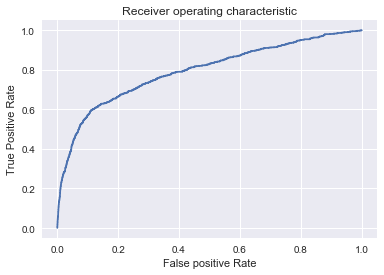

In [231]:
import pylab as pl
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

# Plot tpr vs 1-fpr

pl.plot(fpr,tpr)
pl.xlabel('False positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic')

### Cost-benefit analysis

## Calculating optimum threshold

In [232]:
tresh1 = pd.DataFrame()
tresh1['Y_proba'] = Y_proba
tresh1['probability1'] = 0

#### Threshold = 0.4

In [233]:
tresh1['probability1']=np.where(tresh1['Y_proba'] >= 0.4 ,1,tresh1['probability1'])
tresh1['probability1']=np.where(tresh1['Y_proba'] < 0.4 ,0,tresh1['probability1'])

In [234]:
tresh1['Y_test'] = list(Y_test)

In [235]:
confusion_matrix(tresh1['Y_test'],tresh1['probability1'])

array([[8363,  195],
       [ 719,  285]])

In [236]:
specificity1 = 8259/(8259+788)
specificity1

0.9128993036365646

In [237]:
sensitivity1 = 309/(309+206)
sensitivity1

0.6

#### Threshold = 0.3

In [238]:
tresh2 = pd.DataFrame()
tresh2['Y_proba'] = Y_proba
tresh2['probability1'] = 0

In [239]:
tresh2['probability1']=np.where(tresh2['Y_proba'] >= 0.3 ,1,tresh2['probability1'])
tresh2['probability1']=np.where(tresh2['Y_proba'] < 0.3,0,tresh2['probability1'])

In [240]:
tresh2['Y_test'] = list(Y_test)

In [241]:
confusion_matrix(tresh2['Y_test'],tresh2['probability1'])

array([[8155,  403],
       [ 586,  418]])

#### Threshold = 0.2

In [242]:
tresh3 = pd.DataFrame()
tresh3['Y_proba'] = Y_proba
tresh3['probability1'] = 0

In [243]:
tresh3['probability1']=np.where(tresh3['Y_proba'] >= 0.2 ,1,tresh3['probability1'])
tresh3['probability1']=np.where(tresh3['Y_proba'] < 0.2,0,tresh3['probability1'])

In [244]:
tresh3['Y_test'] = list(Y_test)

In [245]:
confusion_matrix(tresh3['Y_test'],tresh3['probability1'])

array([[7768,  790],
       [ 448,  556]])

#### Threshold = 0.6

In [246]:
tresh4 = pd.DataFrame()
tresh4['Y_proba'] = Y_proba
tresh4['probability1'] = 0

In [247]:
tresh4['probability1']=np.where(tresh4['Y_proba'] >= 0.6 ,1,tresh4['probability1'])
tresh4['probability1']=np.where(tresh4['Y_proba'] < 0.6,0,tresh4['probability1'])

In [248]:
tresh4['Y_test'] = list(Y_test)

In [249]:
confusion_matrix(tresh4['Y_test'],tresh4['probability1'])

array([[8482,   76],
       [ 834,  170]])

### New model scores at T = 0.2

In [ ]:
precision = 